<a href="https://colab.research.google.com/github/xinyang4O4/MAT421/blob/main/ModuleH_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 22.4 Numerical Error and Instability

Error - If the error does not grow, then the scheme is stable; otherwise it is untable. If only certain choices of h is stable, then these integration schemes are also referred to as unstable.

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

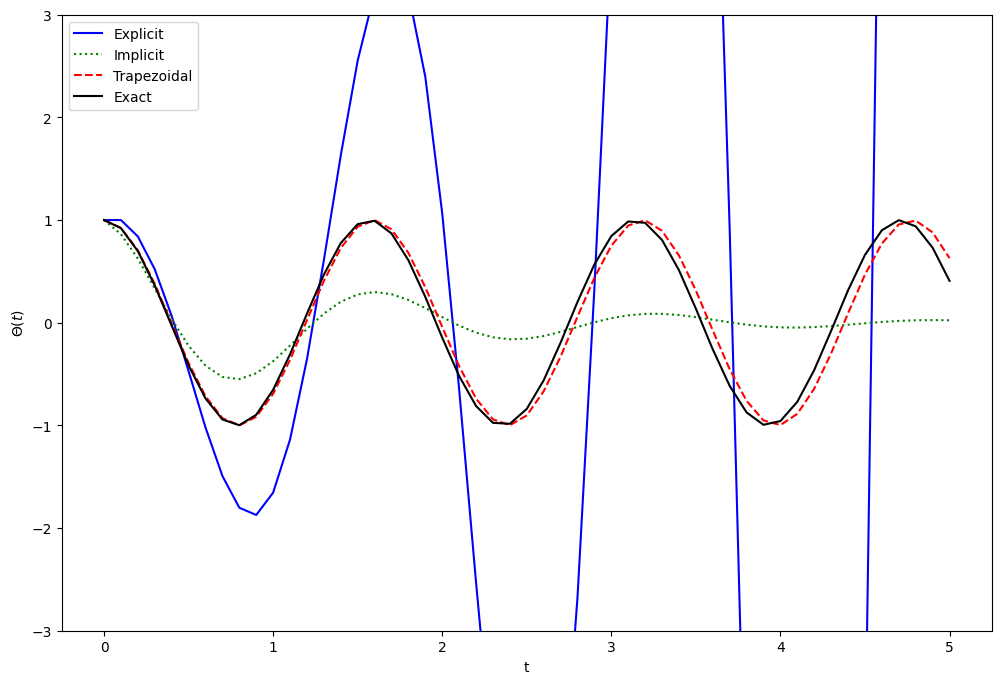

In [2]:
# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h],
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h],
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2],
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

# 22.5 Predictor-Corrector and Runge Kutta Methods

Predictor-Corrector Methods - Given any time and state value, the function, $F(t,S(t))$, returns the change of state $\frac{dS(t)}{dt}$. Predictor-corrector methods of solving initial value problems improve the approximation accuracy of non-predictor-corrector methods by querying the F function several times at different locations (predictions), and then using a weighted average of the results (corrections) to update the state.

Runge Kutta Methods - mprove the accuracy of numerical integration if we keep more terms of the series in $S(t_{j+1})=S(t_j+h)=S(t_j)+S'(t_j)h+\frac{1}{2!}S''(t_j)h^2+...+\frac{1}{n!}S(n)(t_j)h^n$. The larger the n, the more accurate it is.

Second order Runge Kutta Method - Let $F(t,S(t))= \frac{dS(t)}{dt}$, then we can assume an integration formula the form of $S(t+h)=S(t)+c_1F(t,S(t))h+c_2F[t+ph,S(t)+qhF(t,S(t))]h$ where $c_1+c_2=1, c_2p=\frac{1}{2}, c_2q=\frac{1}{2}$

$k_1=F(t_j,S(t_j))$

$k_2=F(t_j+ph,S(t_j)+qhk_1)$

where we will have: $S(t_{j+1})=S(t_j)+\frac{1}{2}(k_1+k_2)h$

Fourth-order Runge Kutta Method -

$k_1=F(t_j,S(t_j))$

$k_2=F(t_j+\frac{h}{2}, S(t_j)+\frac{1}{2}k_1h)$

$k_3=F(t_j+\frac{h}{2}, S(t_j)+\frac{1}{2}k_2h)$

$k_1=F(t_j+h,S(t_j)+k_3h)$

$S(t_{j+1})=S(t_j)+\frac{h}{6}(k_1+2k_2+2k_3+k_4)$

# 22.6 Python ODE Solvers

scipy.integrate.solve_ivp - pyhon function used for solving initial value problems.

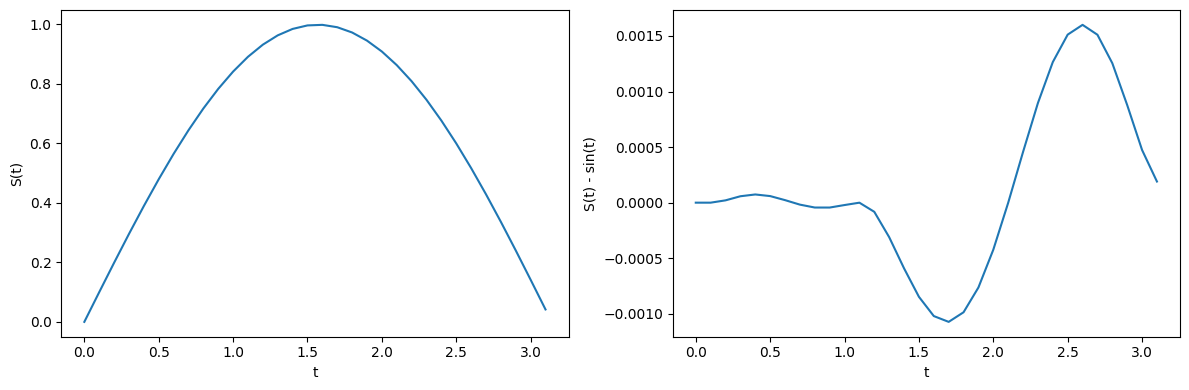

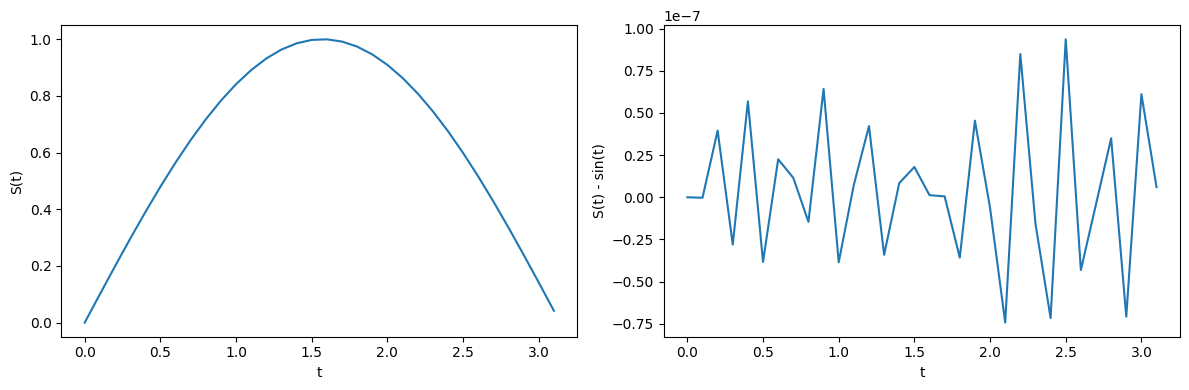

In [3]:
from scipy.integrate import solve_ivp

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
                rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

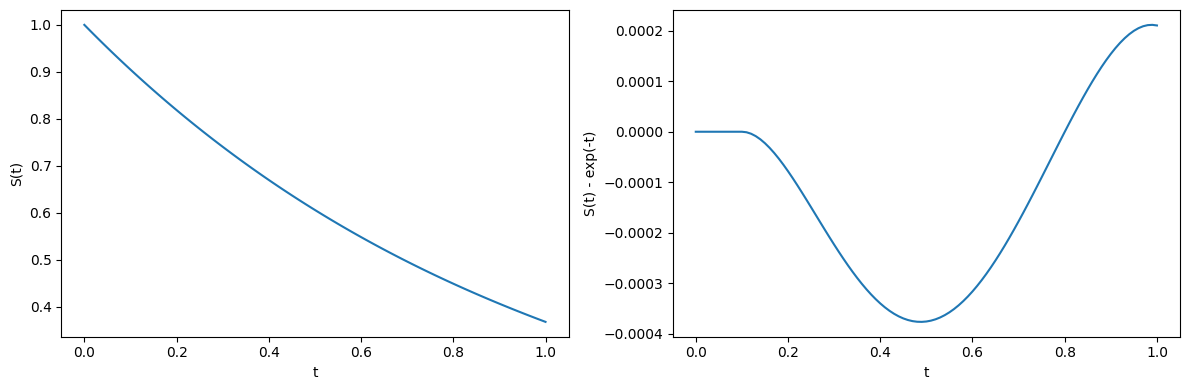

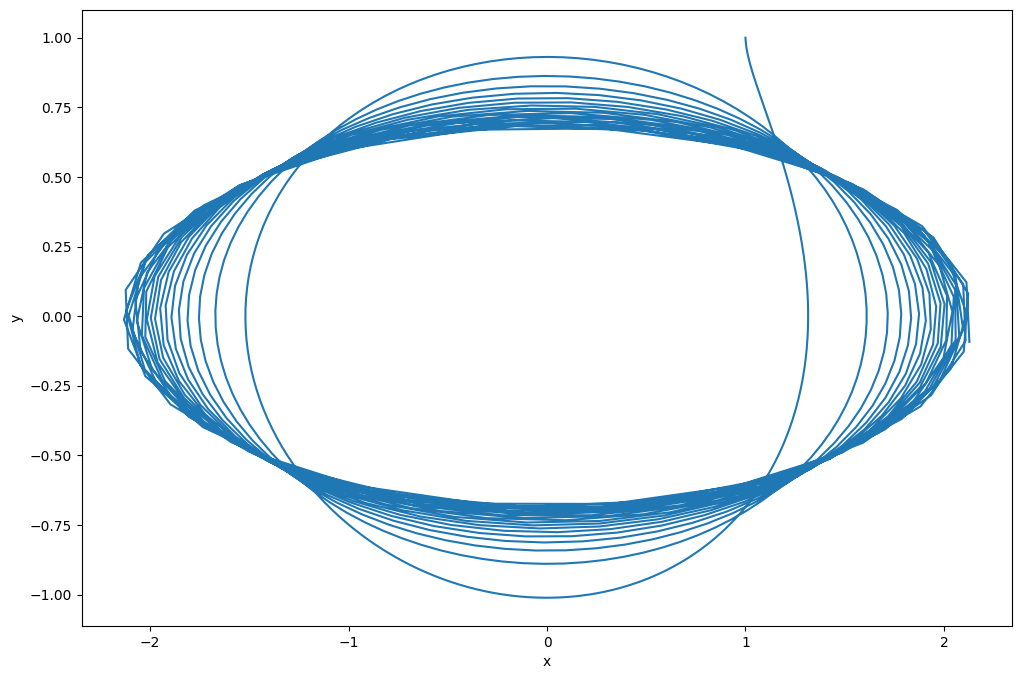

In [4]:
F = lambda t, s: -s

t_eval = np.arange(0, 1.01, 0.01)
sol = solve_ivp(F, [0, 1], [1], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.exp(-sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - exp(-t)')
plt.tight_layout()
plt.show()

F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()